### THỰC HIỆN MÃ HOÁ RC4 DỮ LIỆU TRUYỀN THÔNG VỚI ĐẦU VÀO ,ĐẦU RA LÀ HÌNH ẢNH 

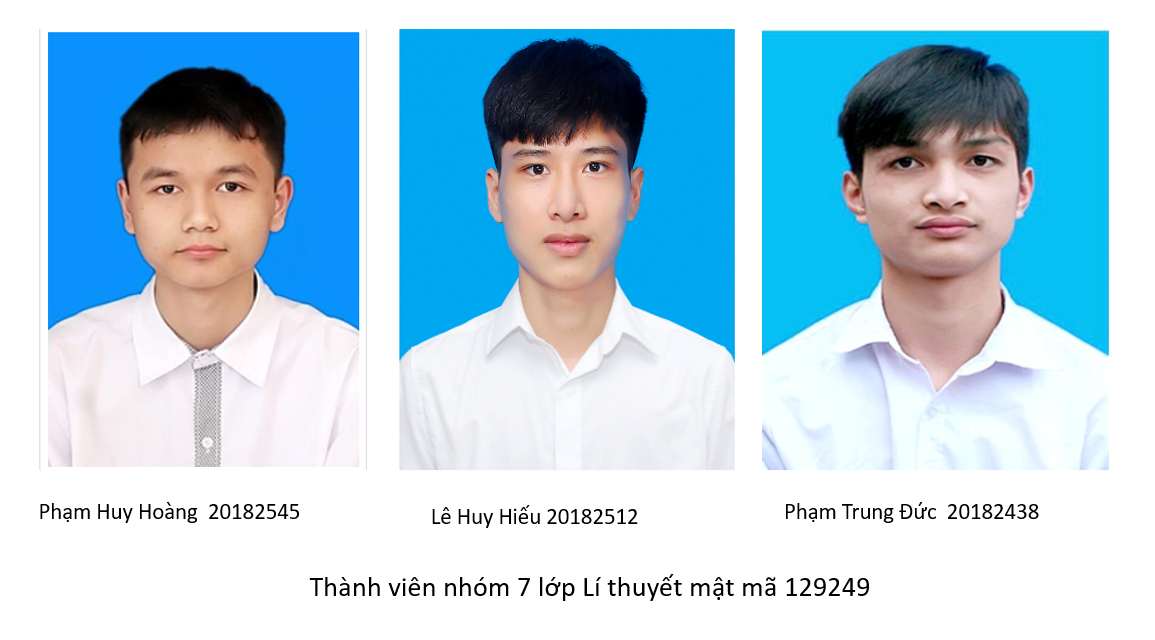

Phân công công việc :

+ Hoàng:Tìm hiểu thuật toán mã hoá RC4 liên quan tới hình ảnh,tìm hiểu code Python minh hoạ,viết báo cáo.
+ Hiếu :Tìm hiểu thuật toán mã hoá RC4 liên quan tới hình ảnh, góp ý. 
+ Đức  :Tìm hiểu thuật toán mã hoá RC4 liên quan tới hình ảnh, góp ý.

Minh hoạ :Cần truyền 1 đi bức ảnh ,thực hiện chuyển đổi ảnh từ dạng jpg về text (string) ,thực hiện mã hoá RC4 và truyền đi .Phía nhận trận giải mã RC4 đoạn text, ghi vào file binary (.bin) để chuyển về ảnh đầu ra dạng jpg .

 

    BỨC ẢNH CẦN MÃ HOÁ :



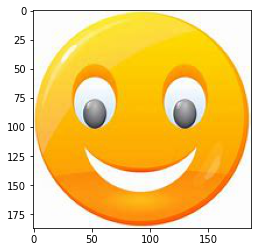

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('Smile_input.jpg')
print(" \n\n    BỨC ẢNH CẦN MÃ HOÁ :\n")
plt.imshow(mpimg.imread('Smile_input.jpg'))

In [2]:
# Sử dụng một số hàm cần thiết trong thư viện Base64 của Python chuyển đổi ảnh về dạng text
import base64
  
with open("Smile_input.jpg", "rb") as image2string:
    converted_string=I= base64.b64encode(image2string.read())
print(" Hình ảnh ban đầu được đưa về dạng text : \n\n")
print(converted_string)
  



 Hình ảnh ban đầu được đưa về dạng text : 


b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAsJCQcJCQcJCQkJCwkJCQkJCQsJCwsMCwsLDA0QDBEODQ4MEhkSJRodJR0ZHxwpKRYlNzU2GioyPi0pMBk7IRP/2wBDAQcICAsJCxULCxUsHRkdLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCz/wAARCAC7ALsDASIAAhEBAxEB/8QAGwAAAQUBAQAAAAAAAAAAAAAAAAECAwQFBgf/xABFEAACAQMBBAYHBQYDBwUAAAABAgADBBEhBRIxURNBYXGBkQYiMkKhscEUI1JickOSotHh8BUzghYkRFNUk7JFY4PS8f/EABsBAAEFAQEAAAAAAAAAAAAAAAUAAgMEBgcB/8QANREAAQMCAwQJBAEEAwAAAAAAAQACAwQRBSExEkFR0QYTIjJhcYHB8EKRobHhFDNS8RVikv/aAAwDAQACEQMRAD8A9bhCESSIQhEkiEI13RBvOQB2/SNc4MBc42AS1yTojMqgliAOZIEo1L1jkUhgfibj4CVz0lQ5Yknm2szNV0jhYdinbtn7D58urTKZxzdkrz3dBeGW/SNPMyFr5/dRR3kmVjuLxJJ7I0vyAHdM9Pjla/6w3wA581abTsG66mN1cn3gO5R9Y03Nz/zW/h/lIck8YQa7EKtx/uu+55qYRMG5TfaroftT4qh+kcL26HHo271KnzU/SVoSRmJVjDcSn73/AGvTCw6hXl2gv7Si47aZDjyODLNK4t6ulOopb8J0b91tZkRCqt7QzyPWO4wtT9IqqP8AugOH2P4y/ChdSMOmS3swmNTubujjDdKg9yqfW/0vx88zQt7yhceqpK1eJpvo3h1GamixinqyGg7LuB9uP78FTkpnx56hWYQhDCrIhCESSIQhEkiEIRJIhCVLm53M06Z9f

In [3]:
# Viết các hàm để thực hiện mã hoá RC4
import codecs

A = 256   #Khai báo hằng A =256
# Viết các hàm để thực hiện mã hoá RC4

# Giai đoạn KSA vector S
def KSA(key):
    key_length = len(key)
    # tạo mảng S
    S = list(range(A))  # [0,1,2, ... , 255]
    j = 0
    for i in range(A):
        j = (j + S[i] + key[i % key_length]) % A
        S[i], S[j] = S[j], S[i]  # Hoán đổi gái trị S[i] và  S[j]

    return S

# Giai đoạn PRGA phát sinh ra Key 
def PRGA(S):
    
    i = 0
    j = 0
    while True:
        i = (i + 1) % A
        j = (j + S[i]) % A
        S[i], S[j] = S[j], S[i]  # Hoán đổi giá trị
        K = S[(S[i] + S[j]) % A]
        yield K

# Hàm lấy ra Keystream 
def get_keystream(key):
    S = KSA(key)
    return PRGA(S)

# Thực hiện Xor bit giữa key và plaintext 
def encrypt_logic(key, text):
    key = [ord(c) for c in key]
    # If key is in hex:
    # key = codecs.decode(key, 'hex_codec')
    # key = [c for c in key]
    keystream = get_keystream(key)
    res = []
    for c in text:
        val = ("%02X" % (c ^ next(keystream)))  # XOR và trả về  hex
        res.append(val)
    return ''.join(res)

# Hàm trả về kết quả mã hoá ,đầu vào plaintext và key
def encrypt(key, plaintext):
    
    plaintext = [ord(c) for c in plaintext]
    return encrypt_logic(key, plaintext)

# Hàm giải mã 
def decrypt(key, ciphertext):
    
    ciphertext = codecs.decode(ciphertext, 'hex_codec')
    res = encrypt_logic(key, ciphertext)
    return codecs.decode(res, 'hex_codec').decode('utf-8')

In [4]:
#print(converted_string)
#file = open('encode.bin', 'rb') 
#output = file.read()
#b=output.encode('utf8')
if __name__ == '__main__':   # hàm main
    key = "Nhom07Ltmm"

converted_string= "b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAsJCQcJCQcJCQkJCwkJCQkJCQsJCwsMCwsLDA0QDBEODQ4MEhkSJRodJR0ZHxwpKRYlNzU2GioyPi0pMBk7IRP/2wBDAQcICAsJCxULCxUsHRkdLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCz/wAARCAC7ALsDASIAAhEBAxEB/8QAGwAAAQUBAQAAAAAAAAAAAAAAAAECAwQFBgf/xABFEAACAQMBBAYHBQYDBwUAAAABAgADBBEhBRIxURNBYXGBkQYiMkKhscEUI1JickOSotHh8BUzghYkRFNUk7JFY4PS8f/EABsBAAEFAQEAAAAAAAAAAAAAAAUAAgMEBgcB/8QANREAAQMCAwQJBAEEAwAAAAAAAQACAwQRBSExEkFR0QYTIjJhcYHB8EKRobHhFDNS8RVikv/aAAwDAQACEQMRAD8A9bhCESSIQhEkiEI13RBvOQB2/SNc4MBc42AS1yTojMqgliAOZIEo1L1jkUhgfibj4CVz0lQ5Yknm2szNV0jhYdinbtn7D58urTKZxzdkrz3dBeGW/SNPMyFr5/dRR3kmVjuLxJJ7I0vyAHdM9Pjla/6w3wA581abTsG66mN1cn3gO5R9Y03Nz/zW/h/lIck8YQa7EKtx/uu+55qYRMG5TfaroftT4qh+kcL26HHo271KnzU/SVoSRmJVjDcSn73/AGvTCw6hXl2gv7Si47aZDjyODLNK4t6ulOopb8J0b91tZkRCqt7QzyPWO4wtT9IqqP8AugOH2P4y/ChdSMOmS3swmNTubujjDdKg9yqfW/0vx88zQt7yhceqpK1eJpvo3h1GamixinqyGg7LuB9uP78FTkpnx56hWYQhDCrIhCESSIQhEkiEIRJIhCVLm53M06Z9f3j+D+sq1VVHSxmWU5fvwCexhebBPr3K0vVX1qnLqXtaUSXqtvMSx7eA7AIopPu77AhSeJOpz8Y16mNFmEr6yaqO3Udlm5vzXz+yIRxhuTcylbo07T2SIuzdnZG5iZgF8pdk3IK21ltUsMxIkjDU+ydmJmJCPDV7ZLmJELARhflGPlZH3inBt1JmBcSIkniYkpvrD9ATthSGoeQjG9bGc5BypGhB5giJCVXTSO1KcGgK9bbRemVp3R3kOAtbrHZUA+c1gQQCCCDggg6Edk5s4Oh4Sa0vHs2COS1qT3mkTy7P779xgnSRzSKesNxudw8+aH1FGHdqPXgt+ERWVgrKQVYAgg5BB6xFnRAbi4QdEIQnqSIQjKjrTRnbgoyf5RrnBoLnZAJAXyChuq/RKFX/ADH9n8o/F/KVrekCDVqeyMkZ6zzMgLPWqM7cWOe4chJa9cFVppoigZ7cdUwsta2pldVTd1vdbxPH3P2RNsRaAxup1Ta9cudNFHAc+0ysTmITkxCcZJOg1MztRM+oeXvKusYGCwTsxMiRGvQGnSD4/OPDqwypBHYcyEAHRS7JGoTsxMxMxhfl5xPc2MXckG3UhYDjIy5PCMyTxhB0lS52TcgpQwBLmGYkJUTrJcwzEiMyr7Rx3xWSsnZhmRirSPviPzPdkjVekEapcwOoII0PGJCeLxWtn3Ztqi21U/cVD90xP+Wx6j2Gb05V1DqVPh3zX2VeGvSNCqfvqAAOeLJwDeHA/wBZ0Xoxi5kH9HMcx3eXJC66my65vrzWnCEJu0HRM2/q5dKI4Lhn7zwH985oMwRWZjoqlj3AZmGGapVLtxZi58+EzeP1JZE2nbq/XyCu0kd3F53KXO4vaZAWyYtSpvE8hpI8zFTvBOy3QIqxlsyhmVVZmOFUZJmZXuWqE9Sg+qv85Lf1d0JTB0Prt3cBmT7P2LVu1Wvcs9KgwzTRdKlRT7xJ4Dlp5dbIKSask6qEXV9higZ10x8ll9JHpXZCGU4Pz751K7F2Oox9lU/mZ6hbzLSjeej1Iqz2LMjjXoqjFkbsVjqD4wrL0bqo2bbSCeA1TGYrSyHZII81Tp1+mXPAjiORjpnUWejW6NwytvGnUVhgqe2X8zIVDHB52lNJGGHLROhG5hmQWUdk6EbmGYrJWTa1UUlzxY+yPqZnvVYkknJjnNW5rinSVnd23KSLxP8AfEzetPR23VQ96zVqh1NNGZKS9mVwx8/CaDDcJmrP7Y8ydFM+aGjaDLqd29c70kno3BQgHVTxHLtE6dtibGZd37KE5Gm9RWHjvTD2jsetZBq1F2q24Prbw+8pZ62xoR2whWdH6inYXmzgNbKOLEaapPV5gnipAQQCOB1EJVtam8hQnVdR3GWMzIvZsmyTmbJsU6NWs1rXo3KD2WxUA95DxEMxHG8rDmNO+SQSuhkbIw2ITbA5HQrq0ZXVHUgqyhlPMEZEdMnYlwats1Bj69u+6Nf2bZK+Wo8JrTtlHUiqgZM3eP8Af5WVniMMhjO5U9oVNy3K9dRgnh7RmWp3aZbrY4Et7Tc9JRT8KF/Fjj6Si59lfwjXvmLxmbbq3H/EAD56orSR2iHjmkzDMbmGYC2Vfsoba2W92kVcZo0QKlUHgwXAVPE8e6dRvTG2QoDbRqdbV0TwVN76zTerTpo9So6oiDLM3Aa4/oJ0HAKVsVIJN7iSfvYIJic5dNsbmgD8KfehvTGqbap02IFrXKjiXK025ewcnzMuWt9bXtNqlB87p3aisMPTbkw+UPgAoaSQs3b1qPur5Bhgy0q2Ov8AA308pTByAeYBm5tBRUsb5T/yGcd6euPlMFfZUflX5Tl/SqlbDVB7R3hf1Wnw6Yy04afpNvRPzDMbmGZkbIhZOzGu2Ec9YVvlDMZWP3VX9D/KetFyF6BmFp7AtFSk944+8q71Oln3aSnBI7z8pub0p2qila2lMcEoUh/CMwuLyjbAb4d3YFkp0l3nIBCljnQDtJnb8PpW01MyMcPzvWQq5zPO554/hXN6ISGBVgCpBBB1BB0IImKNu2wYCtQq0kJxv5FQL2sAAfLM1FqK6q6MrIwDKynKspGQQRL2yCqxJC5mvbfYr+rRH+Uyl6X6G1A8NR4R+Zc2woNbZ9Tr3a6HuGGHzMo5nGscpm01a+NunPNbGnlM8LJDrb9ZJ2YZjcwzAymsp9l1eh2kqcFuFan2Zxvj5fGdROKeoaNe1rD9nUR/3WDTtOOo4GdM6Kzl9M6I/Sf3/pBMVjs9snEfpYe0Gzd1R+EU1H7ob6yqTk55mT3p/wB7uux1H8CytmAa07VTIf8Asf2rsDbRt8gnZjSwUEwzIHfePYOEHzSCJt96stbcrR2Y+t2v4mp1PNdw/ITP2/tM213sm3UnCh76oBjVstSpceXrHy5R9tX6GsrH2T6r/pPX4TD9MN6lfbJu/wBlWtXtww4b9KoamPEMDN70bq21FCI79pmR9cwfnBZ3EojHU7W4q4tyHR2bGW+Eq7PvjabXsyGxTuai2lYdTCqcKfA4PnzmUl56mMyOyZ7vbWxrenqTeUq746qduemdj5Y8ZomjNUTpmvSb18Wl11FqfRjvchZi6S5tC4DbtBceq2/U/VwA8JQzOYdKattRW7DMwwW9d/JaPCoSyC7t5unRdIzMMzKWRWyfEYAhl5gjzGI3MMxWSsuhtX6Shac2p01PYQApnItth7i72oQTu1bk06fDC0KGaaLz5nvOZv7OuApFJj7Lb6dozkgfOefMz2V/tG0qaPb3ddNetd8sp8QQfGdrw6rbWUkcreFj5jVYyeIwzuYfgXRXVZWpAaaCX/Ra+arTv7JmJ+yvTq0sn2adbeyvcCCfGcpVvBuceqa/oZvPU25enSiPs9qrHgWp71Z/LK+cINsDcqB+i6Tajgvar1olRz/rIX6ShHXFY1qtSpjAJwo5KNBIszjOMVTaytkmboTl5DJbCkhMULWHVPhpGZhmCrK1ZRXWqDvI8xOytam/bWjk6vQosfFAZxlwfUH6voZ01kT9isdf+Gof+Am06LyFjnjwCG4ozaiZ5lUb/S9uv1Uz501lbMt7VXdvAeqpQpt3lSyn6SiSAMngI2vZsVMl+JPupKbtRNI4BJUbA3RxPHukOYhYkk8zEzMtPJ1r77kQa2wTsyO8oUNoWdSxugxpEh6LoQKtvVXO7Upk6dZyDxBI647MMySlqpqOTrYHWPzXimSwMmbsyC4XH1Ng+kFN+jpG2rU84Wt0ppDHNkYFh4ZnQ7E2auyFrV2qCttG4To6lcDFOjSyG6Kgp110LE6nHAYl/MMw1N0krpWbAIb4gZ/x6KkzDIGm5F/NOznU5hmNzDMzZzRICydmGY3MMxWXtk7MMxuYZislZPDEEEEgg5BHETK25ssbUZLui60doU0FN2YHoblF9kVN3UMOAIB5EaZGlmGYRocSqKB14HZHUbj6KrPSxzjthcfS2Bt6u4p3D0Lajkb9VX6d8f8At0wAM8skfSdhb06FnaULC0Q07aiDgE71Sq5O81Sq3WxOp/pDMMy7WY9WVjOqcQGnUAWv7qGHD4YnbQFz4p2YZjcwzANlfsnZhmNzDMVkrKG6bCL3k+QnYWVHFnYg8RbUAe/cE4y5y7U6Y4t6oHa53RO9QBERBwRVUdwGJuei0Id1jj4e6E4w7ZjjaN91lbaTC2dbqWq1Fu6qMj4gecxKrcFHeZ1N7bm5tbmiPadCaZ5VF9ZD5gTj98v6xGCdSD1Hl4RvSVhik2x9ftr7JYU4Pi2f8ff4U7MMxsJi7I1ZOzFCuVdgMqm7vdgY4BjMy3s6qlO6prUwaVcNb1A3ArU0GfHEsU0TZZWxvNgcr+ailJYwuAvZVswzL20Nm1bMtVphnteOdS9Hsfs7fPmc8EEZB0MfVUctJIY5RY/NF5FKyZu2w3CdCJpDSVbKWyWETSGkVkrJYRNIaRWSslhmJmJkamKyVk7MXdbcD4O4zMgPNlAJx3ZlmwsK1+wf1ktQfWq8DUx7tLPxPzj9qPSFwlvRAWlaU1pKq8Ax9Zv690Jf8e9lMamXIHJvieVlWM4MvUtzO/w/lUsxygcTGDUyVQW0EoMZcqd2SY2hiZgx9Y9mkjd9xGbkNO/qjS3OycBdP2fT+07WtE4qlXpG5btEb2fPE7jAnMejFuS13eMNNLamefB3PyE6edP6P0/U0m0fqN/ZZrGZdqo2Bo0WSTktq232W+qYGKV1vXFLkHz94vnr4zrpQ2pY/brVkTAr0z0tuxwMVF90nk3A/wBJZxeh/raYsHeGY+eKrYfUCCYF2hyPNcpCRCopGuVYEqykesrA4IPdDpF7Zy3qyDay2eyVLCQmr+X4xOlbqAnojK92Cuy2bdreW67xBrUwErDmcaN3GVL3YVGqWq2ji3qnJKYzRc/pHDw8pz1rfXNpWStTwcaOh0FROtT9J2drd0Lyitai2VOjKfaRutWHOdAw+eDFIBBUi7h+fEe6y9XBNh8vWwmzT8sfZcdc0NoWRP2q2cKP2tP1qZ7d4aeeJCLmgffx+oH6aTvsDhKFxsfZFySatpT3jxelmkxPMmmRKdR0XBN4H+h5/wAKzDjLDlMz1HI81yYqUzwdP3hF3l/EvmJs1PRPZTZKVr2n2Cqjj+NSfjIf9j7P/r7v92j/ACg49G6oaW+6IDEqI/WR6LLL0xxdB3ssYbigvFwe4E/0m5T9Etlr7dxev/8AJTQfwJn4zRt9h7FtiClojMODVi1U9/3hI+Elj6Mzu77gFFJitIwdm7vS37XLW6Xt6d2ztqlQcDUIxTHe59X4zdstgIpWpf1BWYaiimRRU/m6z8JugAAAAADgBoBIq9ehbUnrVnC014k8SeoAc4dpcCpaQdZL2iOOn25oRPik0/YiGzfhmfvyUV5c07K2aphd4AU6KYwC+NAAOocT3TkSzMWZiSxJLE8STqTFv9oXF9XNQ5SmuVo09PUXme09f9JXV6hOSRjtAmXxmtNdMAzuN05o1QUJp47u7x15KyowO2WVAVcnvMq0mYneIGB84la59wDP4iD8INYzq27ZVhzHPdshITkk8yTKtwzu9OjTBZyyqqji1RzhVjmrqq5xqdFGmpmp6N2Jr122hVBNOizJQz79Y6M/cvDvPZH4fROqpwwb/hU0sjaWJ0z92niV0lhaLZWltbLg9Gg32HvVD6zN4nMtQhOrsYI2hjdAsA95e4vdqURIsI9NXLekGzjSdtpUFzTbAvEUeyeArAf+XnMUYIBByDqDPQmUMCrAFWBVgQCCDoQQZxu1dlvsyoa1FWbZ9RuAyTbMx9k/l5eXfi8bwstJqYRlvHutXhNeHtFPIcxp4+HnwWfiGI8YIBByCMgjgYYEySPXTcCT2tzc2dUVaDbrcGU6q45MJFiLiPZI6Nwew2ITHgPaWuFwV1dltmzuQq1SKFY6FXPqMfyOdPOak4HczLdvd39tgUa9QKPcbDp4K2RNVS9Iy0bNS2/iOSztTg7Sbwut4HmuzhOdp7bvQAKlGi/aN5CfiR8JN/jr/wDSD/un/wCsMNx6hcLl9vQoY7Dagbr+oW5Cc8+3Lw56OhRXtYu+PlM+4vto3AIqXD7h4pTwi45ELj4yCXpFSMHYu70t+1LHhMzz2rBdBebXsrTeUN01Yfs6RBwfztwH96Tl7y9ur6pv129UZ6OmuiIDyH1kRXETEy9di09Z2Tk3gPfitDSUEVN2hm7imYEcMYEMQwIJuiJzQWbUAkA8e2RnCgsTgDUmPbdUFmOAOJMr06d1tC4p2tshZm1AOiqo41Kh6gP71MkjY6Vwa3NOaBYuOQGpUllaV9qXiUKeVT2qj4yKNLOrHtPAdvdp6Bb0KNtRo0KKBaVJAiKOoDn285W2Zs232bbijT9Z2IavVIw1V+fcOof2b06LhWHCjju7vHXksZimIf1cmyzuN08fFEIQhhCEQhCJJEa6JUV0dVZHBVlYAqwOhBBjoTwi+qS4/aexbixZ7ixV6toctUo6tUo8yvWV+I7eIzKdWnUGVOezrE9DmFtL0etbtmr2rC2uid4lR91UP51HA9o8jMpiOBB5MlNkeHJaaixcECOp/wDXPmuczHDEhuKd/YOKd9QZMnC1V1pv+lhp8j2QSqj+ywPZ1+Ux8kL4zsvFitFbabtNNwd4VoESQESrvGOFSQFqidGSrYKx28spipF6WM2CoupKskrIyRIeljTUM9DCnCIhSsRIyRG7xMjeqie2wHZxPlJA1TtYVJmMqVadMZY69SjiZWa5qVGWlQRi7nCKql6jH8qrmbOzvRi7rla20majTOvQIwNd/wBbDQeGT3S/S0E1S60YSmkipW7dQ63hvPosy1tdobWrdFbp6iH7yo2eioj8x6zyHHu6u42bsy12ZR6KiCzvg1qzgb9Vhz7B1D/9Nmhb21tSp0beklKkgwqIMAdvfzks3eH4XHRja1dx5LIYhij6vsNGyzhx80QhCF0HRCEIkkQhCJJEIQiSRCEIkkypTp1UanURXRhhlcBlI7QdJg3nots6sWe1Z7WpxAT16Of0McjwYToYSvPTRVAtK26s09VNTG8TiPnDRcLX2F6RWxPRqlyg4Gk4LY/RUwfImZ9SpeW5xc2lakevpKdRPiwx8Z6VEODx174Dm6PwPzjJH5RqLH5BlKwO8sl5mL2ieo+BU/WO+10eT/D+c9Cey2fVyatpbOT1vRpsfMiR/wCD7EP/AKdZ/wDYp/ylE9HHX7Lwrgx6n3xn7rz83lIe6fEgRovHc7tKnvE8Au9UPkk9DXZmyEI3LCzGOGKFLPyllEp0ximiIOSKFHwj29G/8n/hNd0ghHciJ8z/AAvPqOzfSK7xuWlZEPvVcUEx/rw3wmtaeiLnDX9330rUa9xq1B8lnXQhODBKaLN3a81Qmx6pkFo7MHhr+VUs9nbPsF3bW3SnkYZ8b1R/1O2WPnLcIQ0xjWDZaLBBHvdI7aebnxRCEI5MRCEIkkQhCJJf/9k='"
ciphertext = encrypt(key,converted_string )
print('Mã hoá RC4 đoạn text ảnh , ghi vào file CINPHERTEXT.txt :\n\n',ciphertext)

   

Mã hoá RC4 đoạn text ảnh , ghi vào file CINPHERTEXT.txt :

 712EA94853510554E1A7E623DD86ABC71ADDB1A2D412E964EECCF4655C61807F0AFAA19304A4B3370311AF79D1F28CF9EA8D82C28DDDF8B6B69B2E1F9376A13C802AB886DE6830DA4B6ECC943A7D06598CCF1F94DC1A2F14C78F758FB7B402CF11A412C1DDD8D8CD70BA23A2FDDE6ACF1AA2AF6997F6747951880B8C768E0E0266C67D878DE90B5384425A4105445E8952AC172C31B799363446C9C9C2F9A16AE5703FBDACAF529E1B3BF5D86FCF3213982A7C236E11D8FB91DE37A14F24EF475D728686E5662C3A4DA4951C96BB3AE1204C43582641446B7A424A8AA9965E62BA2EBF7421B9D87DE6C7594671EBC980D4EFEF028054BD036A1E73DC6625A4B5F87137D6DF701374EDD0146E491D85616DB164EBAB5F6C78619E96F59890AA39EB4920D1227889F7837B90F37D878DAE30E08F631237EAD7DF57001F0520266898B13BB753039029BD7230060E37201E5A02CCEB26CB1E27036ADA29CE9AA4A2DFCE24DD96FDE98B105E726F0DC2003F7C1F2111D2B7318B00317C821EF606E36121A35A8EBE436D41F37963B3B7D831BD066AD43837B6DE6C820AD3550F7D6EF5E8503AB17B78CB55CF840FCBC526A4C46D98400B0B20576339624510229488AA08760769B936E0B8874FC4CEEDFA0617416A778BCD

In [5]:
 
l= decrypt(key,ciphertext) # Giải mã dữ liệu

print("Giải mã dữ liệu trong file CINPHERTEXT.txt và ghi vào file  encode.bin : \n\n\n ",l)
with open('encode.bin', "wb") as file:    
    file.write(I)

Giải mã dữ liệu trong file CINPHERTEXT.txt và ghi vào file  encode.bin : 


  b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAsJCQcJCQcJCQkJCwkJCQkJCQsJCwsMCwsLDA0QDBEODQ4MEhkSJRodJR0ZHxwpKRYlNzU2GioyPi0pMBk7IRP/2wBDAQcICAsJCxULCxUsHRkdLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCz/wAARCAC7ALsDASIAAhEBAxEB/8QAGwAAAQUBAQAAAAAAAAAAAAAAAAECAwQFBgf/xABFEAACAQMBBAYHBQYDBwUAAAABAgADBBEhBRIxURNBYXGBkQYiMkKhscEUI1JickOSotHh8BUzghYkRFNUk7JFY4PS8f/EABsBAAEFAQEAAAAAAAAAAAAAAAUAAgMEBgcB/8QANREAAQMCAwQJBAEEAwAAAAAAAQACAwQRBSExEkFR0QYTIjJhcYHB8EKRobHhFDNS8RVikv/aAAwDAQACEQMRAD8A9bhCESSIQhEkiEI13RBvOQB2/SNc4MBc42AS1yTojMqgliAOZIEo1L1jkUhgfibj4CVz0lQ5Yknm2szNV0jhYdinbtn7D58urTKZxzdkrz3dBeGW/SNPMyFr5/dRR3kmVjuLxJJ7I0vyAHdM9Pjla/6w3wA581abTsG66mN1cn3gO5R9Y03Nz/zW/h/lIck8YQa7EKtx/uu+55qYRMG5TfaroftT4qh+kcL26HHo271KnzU/SVoSRmJVjDcSn73/AGvTCw6hXl2gv7Si47aZDjyODLNK4t6ulOopb8J0b91tZkRCqt7QzyPWO4wtT9IqqP8AugOH2P4y/ChdSMOmS3swmNTubujjDdKg9yqfW/0vx88zQt7yhceqpK1eJpvo3h1GamixinqyGg7LuB9uP78FTkpnx56hWYQh

 

 ẢNH KHÔI PHỤC TỪ DẠNG TEXT TRONG FILE OUTPUT.TXT


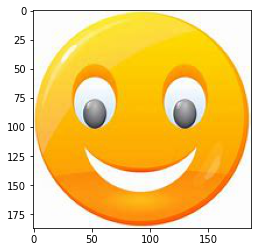

In [6]:

file = open('encode.bin', "rb") 
output = file.read()
file.close()
#b=output.encode('utf8')
#b = bytes(output, 'utf-8')
decodeit = open('Smile_output.jpg', 'wb') #lưu vào ảnh và đặt tên output.jpeg
decodeit.write(base64.b64decode((output)))
decodeit.close()
print(" \n\n ẢNH KHÔI PHỤC TỪ DẠNG TEXT TRONG FILE OUTPUT.TXT")
plt.imshow(mpimg.imread('Smile_output.jpg'))

( Nhóm 07 hiện tại vẫn còn một số lỗi về code chưa khắc phục được tại phần RC4 cho hình ảnh này )

___________Kết thúc___________